In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('DataAnalyst.csv', encoding='gb2312')

In [3]:
df.head(2)

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生


In [4]:
df_duplicates = df.drop_duplicates(subset = 'positionId', keep='first')
df_duplicates.head(2)

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生


In [5]:
def cut_word(word, method):
    cut_pos = word.find('-')
    length = len(word)
    if cut_pos != -1:
        bottomSalary = word[: cut_pos - 1]
        topSalary = word[cut_pos+1 : length-1]
    else:
        bottomSalary = word[:word.upper().find("K")]
        topSalary = bottomSalary
    if method == 'bottom':
        return bottomSalary
    else:
        return topSalary

In [6]:
df_duplicates['bottomSalary'] = df_duplicates.salary.apply(cut_word, method = 'bottom')
df_duplicates['topSalary'] = df_duplicates.salary.apply(cut_word, method = 'top')
df_duplicates.topSalary = df_duplicates.topSalary.astype('int')
df_duplicates.bottomSalary = df_duplicates.bottomSalary.astype('int')

c:\users\t460s\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\t460s\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
c:\users\t460s\appdata\local\programs\python\python35\lib\site-packages\pandas\core\generic.py:3110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [7]:
df_duplicates['avgSalary'] = df_duplicates.apply(lambda x: (x.bottomSalary+x.topSalary)/2, axis=1)

c:\users\t460s\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
df_clean = df_duplicates[['city', 'companyShortName', 'companySize', 'education',
                         'positionName', 'positionLables', 'workYear', 'avgSalary']]
df_clean.head(3)

,city,companyShortName,companySize,education,positionName,positionLables,workYear,avgSalary
0,上海,1号店,2000人以上,硕士,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0
1,上海,点融网,500-2000人,本科,数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5
2,上海,SPD,50-150人,本科,数据分析师,"['分析师', '数据分析', '数据']",应届毕业生,5.0


In [9]:
df_clean.city.value_counts()

北京    2347
上海     979
深圳     527
杭州     406
广州     335
成都     135
南京      83
武汉      69
西安      38
苏州      37
厦门      30
长沙      25
天津      20
Name: city, dtype: int64

In [10]:
df_clean.describe()

,avgSalary
count,5031.000000
mean,17.111409
std,8.996242
min,1.500000
25%,11.500000
50%,15.000000
75%,22.500000
max,75.000000


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

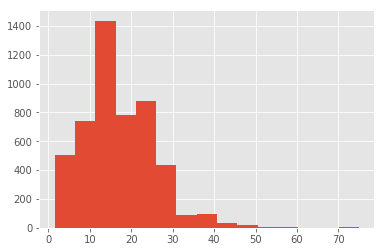

In [12]:
df_clean.avgSalary.hist(bins=15)

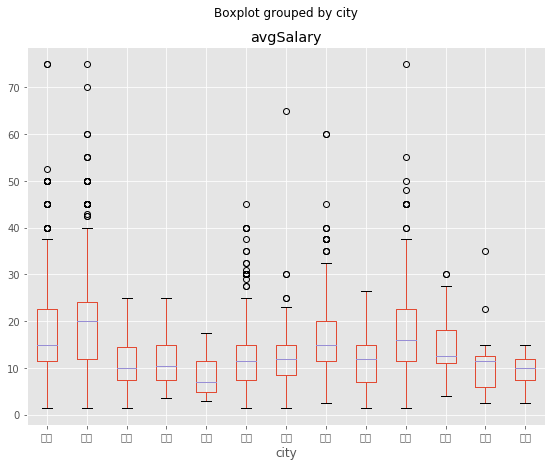

In [13]:
df_clean.boxplot(column='avgSalary', by='city', figsize=(9, 7))

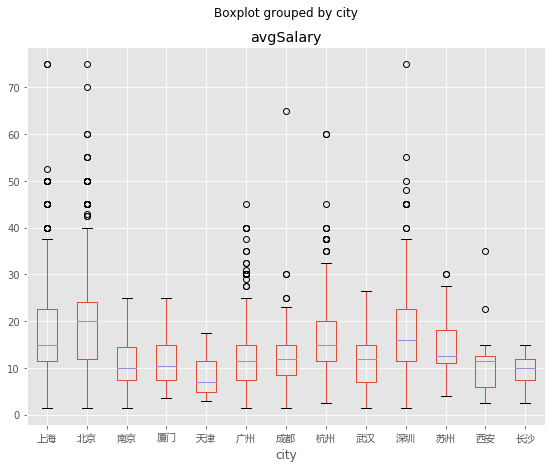

In [14]:
from matplotlib.font_manager import FontProperties
font_zh = FontProperties(fname="C:\Windows\Fonts\msyh.ttc")

ax = df_clean.boxplot(column='avgSalary', by='city', figsize=(9, 7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

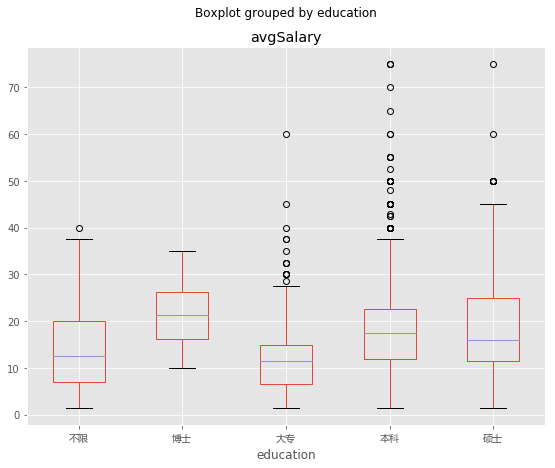

In [15]:
ax = df_clean.boxplot(column='avgSalary', by='education', figsize=(9,7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

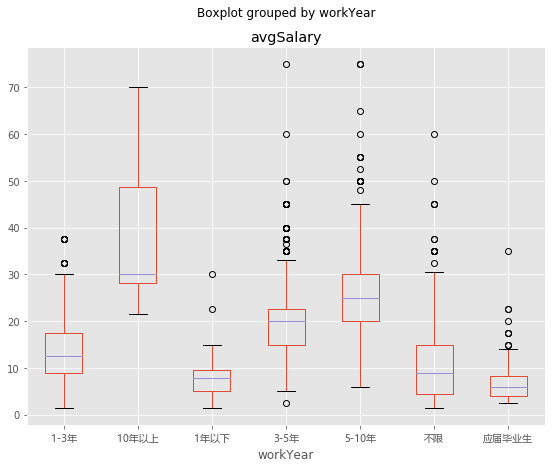

In [16]:
# df_clean.sort_values('workYear')
ax = df_clean.boxplot(column = 'avgSalary', by = 'workYear', figsize=(9, 7))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

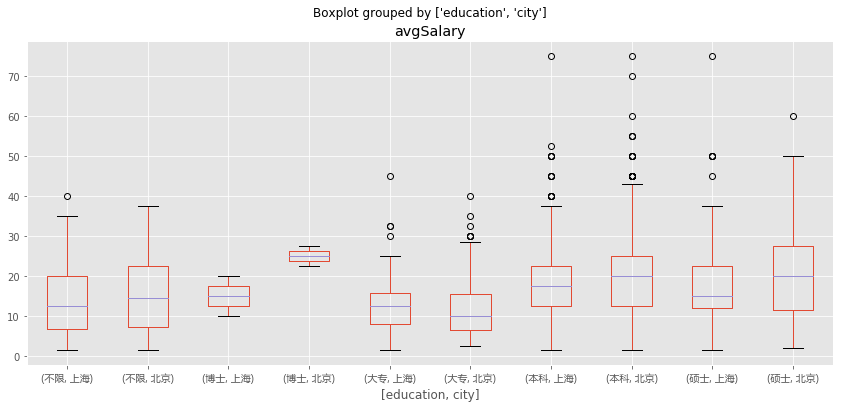

In [17]:
df_sh_bj = df_clean[df_clean['city'].isin(['上海', '北京'])]

ax = df_sh_bj.boxplot(column = 'avgSalary', by = ['education', 'city'], figsize = (14, 6))
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

In [18]:
df_clean.groupby('city').count()

,companyShortName,companySize,education,positionName,positionLables,workYear,avgSalary
city,,,,,,,
上海,979,979,979,979,973,979,979
北京,2347,2347,2347,2347,2336,2347,2347
南京,83,83,83,83,82,83,83
厦门,30,30,30,30,30,30,30
天津,20,20,20,20,20,20,20
广州,335,335,335,335,333,335,335
成都,135,135,135,135,134,135,135
杭州,406,406,406,406,405,406,406
武汉,69,69,69,69,69,69,69


In [19]:
df_clean.groupby('city').mean()

,avgSalary
city,
上海,17.280388
北京,18.688539
南京,10.951807
厦门,10.966667
天津,8.250000
广州,12.702985
成都,12.848148
杭州,16.455665
武汉,11.297101


In [20]:
df_clean.groupby(['city', 'education']).mean()

avgSalary
city education           
上海   不限         14.051471
     博士         15.000000
     大专         13.395455
     本科         17.987552
     硕士         19.180000
北京   不限         15.673387
     博士         25.000000
     大专         12.339474
     本科         19.435802
     硕士         19.759740
南京   不限          7.000000
     大专          9.272727
     本科         11.327869
     硕士         13.500000
厦门   不限         12.500000
     大专          6.785714
     本科         11.805556
     硕士         15.750000
天津   不限          3.500000
     大专          5.500000
     本科          9.300000
广州   不限          9.250000
     大专          8.988095
     本科         14.170259
     硕士         14.571429
成都   不限         10.562500
     大专         11.000000
     本科         13.520202
     硕士         12.750000
杭州   不限         18.269231
     大专         12.327586
     本科         16.823432
     硕士         20.710526
武汉   不限         10.950000
     大专         11.214286
     本科         11.500000
     硕士          7.000000
深圳   不限         15.100000
     博士         35.000000
     大专         13.898936
     本科         18.532911
     硕士         18.029412
苏州   大专         14.600000
     本科         14.310345
     硕士         16.833333
西安   不限          8.666667
     大专          8.150000
     本科         12.208333
     硕士          5.000000
长沙   不限          7.642857
     大专          9.000000
     本科         10.633333
     硕士          9.000000

In [21]:
df_clean.groupby(['city', 'education']).mean().unstack()

avgSalary                                       
education         不限    博士         大专         本科         硕士
city                                                       
上海         14.051471  15.0  13.395455  17.987552  19.180000
北京         15.673387  25.0  12.339474  19.435802  19.759740
南京          7.000000   NaN   9.272727  11.327869  13.500000
厦门         12.500000   NaN   6.785714  11.805556  15.750000
天津          3.500000   NaN   5.500000   9.300000        NaN
广州          9.250000   NaN   8.988095  14.170259  14.571429
成都         10.562500   NaN  11.000000  13.520202  12.750000
杭州         18.269231   NaN  12.327586  16.823432  20.710526
武汉         10.950000   NaN  11.214286  11.500000   7.000000
深圳         15.100000  35.0  13.898936  18.532911  18.029412
苏州               NaN   NaN  14.600000  14.310345  16.833333
西安          8.666667   NaN   8.150000  12.208333   5.000000
长沙          7.642857   NaN   9.000000  10.633333   9.000000

In [22]:
df_clean.groupby(['city', 'education']).avgSalary.count().unstack()

education,不限,博士,大专,本科,硕士
city,,,,,
上海,68.0,3.0,110.0,723.0,75.0
北京,124.0,2.0,190.0,1877.0,154.0
南京,5.0,NaN,11.0,61.0,6.0
厦门,3.0,NaN,7.0,18.0,2.0
天津,1.0,NaN,4.0,15.0,NaN
广州,12.0,NaN,84.0,232.0,7.0
成都,8.0,NaN,26.0,99.0,2.0
杭州,26.0,NaN,58.0,303.0,19.0
武汉,10.0,NaN,14.0,44.0,1.0


In [23]:
df_clean.groupby('companyShortName').avgSalary.agg(['count', 'mean']).sort_values(by='count', ascending = False)

,count,mean
companyShortName,,
美团点评,175,21.862857
滴滴出行,64,27.351562
百度,44,19.136364
网易,36,18.208333
今日头条,32,17.125000
腾讯,32,22.437500
京东,32,20.390625
百度外卖,31,17.774194
个推,31,14.516129


In [24]:
df_clean.groupby('companyShortName').avgSalary.agg(lambda x: max(x) - min(x))

companyShortName
12580               0.0
12家全国性股份制商业银行之一     0.0
1号店                22.0
2345.com            4.0
360                22.0
360企业安全             0.0
360金融               0.0
4399                0.0
4399游戏              5.0
500.com集团          15.0
51Talk 无忧英语        15.0
51信用卡管家            20.0
51爱趣淘               0.0
55海淘                0.0
58到家               30.0
58车                 0.0
AIRCOS              0.0
APUS Group         27.0
AbleCloud           2.5
Adhub               0.0
Alading Bank        0.0
Asia-analytics      0.0
Avazu Holding       0.0
BBD                63.5
BOE                 0.0
BTCC                3.0
BUGBANK             0.0
BW                  5.5
Baca                0.0
Base FX             0.0
                   ... 
驻云                  0.0
高伟达软件股份有限公司        17.5
高升控股               12.5
高德联讯                0.0
高校邦                 0.0
高阳通联                0.0
鬼吹灯3D               0.0
魔品科技                0.0
魔秀科技                2.5
魔窗                 10.0

In [25]:
def topN(df, n=5):
    counts = df.value_counts()
    return counts.sort_values(ascending = False)[:n]

In [26]:
df_clean.groupby('city').companyShortName.apply(topN)

city                 
上海    饿了么                 23
      美团点评                19
      返利网                 15
      买单侠                 15
      点融网                 11
北京    美团点评               156
      滴滴出行                60
      百度                  39
      今日头条                32
      百度外卖                31
南京    途牛旅游网                8
      通联数据                 7
      中地控股                 6
      创景咨询                 5
      南京领添                 3
厦门    美图公司                 4
      Datartisan 数据工匠      2
      厦门融通信息技术有限责任公司       2
      浩渺网络                 1
      美柚                   1
天津    神州商龙                 2
      易商互动                 1
      三汇数字天津分公司            1
      丰赢未来                 1
      瑞达恒RCC               1
广州    探迹                  11
      唯品会                  9
      广东亿迅                 8
      阿里巴巴移动事业群-UC         7
      卡宝宝                  6
                        ... 
杭州    个推                  22
      有数金服                15
      网易             

In [27]:
df_clean.groupby('city').positionName.apply(topN)

city                        
上海    数据分析师                      79
      大数据开发工程师                   37
      数据产品经理                     31
      大数据工程师                     26
      需求分析师                      20
北京    数据分析师                     238
      数据产品经理                    121
      大数据开发工程师                   69
      分析师                        49
      数据分析                       42
南京    大数据开发工程师                    5
      数据分析师                       5
      大数据架构师                      3
      大数据工程师                      3
      南京金融数据分部---研发工程师---Web      2
厦门    数据分析专员                      3
      数据分析师                       3
      大数据开发工程师                    2
      数据分析经理/主管                   1
      数据工程师                       1
天津    数据分析师                       3
      数据工程师                       2
      业务/数据研究岗                    1
      数据编辑（天津）                    1
      高级需求分析师                     1
广州    数据分析师                      31
      需求分析师                      23

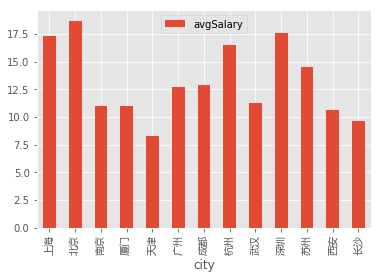

In [28]:
ax = df_clean.groupby('city').mean().plot.bar()
for label in ax.get_xticklabels():
    label.set_fontproperties(font_zh)

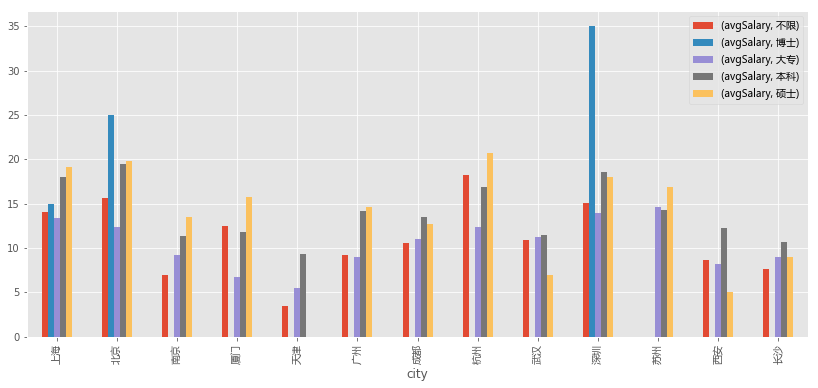

In [29]:
ax = df_clean.groupby(['city', 'education']).mean().unstack().plot.bar(figsize=(14, 6))
for label_x in ax.get_xticklabels():
    label_x.set_fontproperties(font_zh)
ax.legend(prop = font_zh)

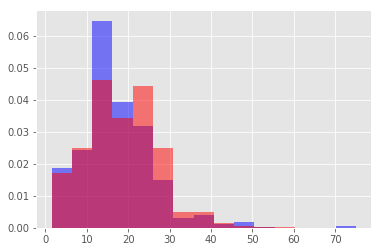

In [30]:
plt.hist(x = df_clean[df_clean.city == '上海'].avgSalary,
        bins = 15,
        normed = 1,
        facecolor = 'blue',
        alpha = 0.5)
plt.hist(x = df_clean[df_clean.city == '北京'].avgSalary,
        bins = 15,
        normed = 1,
        facecolor = 'red',
        alpha = 0.5)
plt.show()

In [31]:
bins = [0, 3, 5, 10, 15, 20, 30, 100]
level = ['0-3', '3-5', '5-10', '10-15', '15-20', '20-30', '30+']
df_clean['level'] = pd.cut(df_clean['avgSalary'], bins = bins, labels = level)

c:\users\t460s\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
df_clean[['avgSalary', 'level']]

,avgSalary,level
0,8.0,5-10
1,12.5,10-15
2,5.0,3-5
3,7.0,5-10
4,2.5,0-3
5,12.5,10-15
6,10.5,10-15
7,6.0,5-10
8,6.0,5-10
9,3.0,0-3


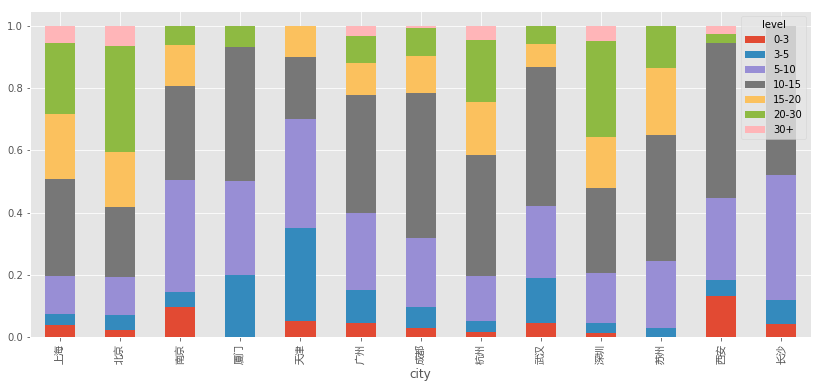

In [33]:
df_level = df_clean.groupby(['city', 'level']).avgSalary.count().unstack()
df_level_prop = df_level.apply(lambda x: x/x.sum(), axis = 1)
ax = df_level_prop.plot.bar(stacked = True, figsize=(14, 6))
for label_x in ax.get_xticklabels():
    label_x.set_fontproperties(font_zh)

In [34]:
df_clean.positionLables.head(3)

0    ['分析师', '数据分析', '数据挖掘', '数据']
1    ['分析师', '数据分析', '数据挖掘', '数据']
2            ['分析师', '数据分析', '数据']
Name: positionLables, dtype: object

In [35]:
df_clean.positionLables.str[1:-1].head()

0    '分析师', '数据分析', '数据挖掘', '数据'
1    '分析师', '数据分析', '数据挖掘', '数据'
2            '分析师', '数据分析', '数据'
3       '商业', '分析师', '大数据', '数据'
4      '分析师', '数据分析', '数据', 'BI'
Name: positionLables, dtype: object

In [36]:
df_clean.positionLables.str[1:-1].str.replace(' ', '').head(3)

0    '分析师','数据分析','数据挖掘','数据'
1    '分析师','数据分析','数据挖掘','数据'
2           '分析师','数据分析','数据'
Name: positionLables, dtype: object

In [37]:
word = df_clean.positionLables.str[1:-1].str.replace(' ', '')

In [38]:
df_word = word.dropna().str.split(',').apply(pd.value_counts)

In [39]:
df_word.unstack().head()

'.NET'  0   NaN
        1   NaN
        2   NaN
        3   NaN
        4   NaN
dtype: float64

In [40]:
df_word.unstack().dropna().reset_index().head(10)

,level_0,level_1,0
0,'.NET',1397,1.0
1,'.NET',2822,1.0
2,'.NET',3765,1.0
3,'.NET',3949,1.0
4,'.NET',3954,1.0
5,'.NET',4114,1.0
6,'15天年假',1726,1.0
7,'Android',1821,1.0
8,'BD',360,1.0
9,'BD',661,1.0


In [41]:
from wordcloud import WordCloud

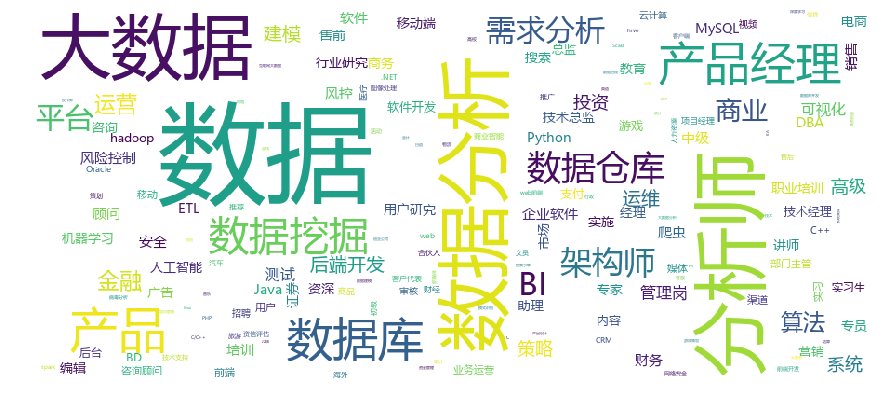

In [48]:
df_word_counts = df_word.unstack().dropna().reset_index().groupby('level_0').count()
df_word_counts.index = df_word_counts.index.str.replace("'", "")

wordcloud = WordCloud(font_path="C:\Windows\Fonts\msyh.ttc",
                    width = 900, height = 400,
                    background_color = 'white')

f, axs = plt.subplots(figsize=(15, 15))
wordcloud.fit_words(df_word_counts.level_1)
axs = plt.imshow(wordcloud)
plt.axis('off')
plt.show() 